Intro:
    We expect, intuitively, that unemployment rate and home price appreciation are deeply intertwined economic factors. Data from before and after the economic crisis supports this intuition. Avoiding the question of which factor (if any) has causal priority, in this notebook we will see that delinquency correlates more with unempolyment than with HPA. Given the variation in economic conditions across the US, we find that an analysis of mortgage performance, vintage 2005-2012, by state is anillustrative experiment. 

In [8]:
import pandas as pd
import numpy as np
from IPython.display import display
pd.options.mode.chained_assignment = None 

We prepare the state-wide hpi data, and from it infer hpa, a 'home price' indicator that is more comparable to unemployment, in that change in both is additive. 

In [9]:
state_hpi = pd.read_csv('state_hbi.csv')
state_hpis= state_hpi.loc[360:]
state_hpis.loc[:,'Date'] = state_hpis.apply(lambda x: x.loc['Date'][3:] + x.loc['Date'][:2], axis=1)
state_hpis.Date=state_hpis.Date.astype(int, copy=False)

In [10]:
state_hpi = pd.read_csv('state_hbi.csv')
state_hpis= state_hpi.loc[360:]
state_hpis.loc[:,'Date'] = state_hpis.apply(lambda x: x.loc['Date'][3:] + x.loc['Date'][:2], axis=1)
#state_hpi_06.loc[:,'Date'] = state_hpi_06.apply(lambda x: x.loc['Date'][3:] + x.loc['Date'][:2], axis=1)
state_hpis.Date=state_hpis.Date.astype(int, copy=False)
state_hpis.set_index('Date', inplace = True)
#for loans in Guam,Puerto Rico, & the Virgin Islands, I set 'state' hpi to national levels. 
state_hpis.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
Date,,,,,,,,,,,,,,,,,,,,,
200501,189.97,170.60,174.41,238.16,247.50,256.91,180.11,278.85,187.05,248.90,...,174.18,163.91,226.84,208.21,199.2,187.50,211.69,211.94,170.05,232.76
200502,191.67,171.62,175.04,243.05,251.36,258.36,181.03,277.89,188.32,253.84,...,175.59,164.49,228.08,210.63,200.5,187.70,213.37,211.37,169.90,235.48
200503,194.20,172.94,176.18,252.32,256.84,260.98,184.13,291.93,191.57,259.98,...,176.85,165.91,231.16,214.32,203.3,191.36,217.84,214.46,172.42,237.33
200504,196.74,174.25,177.33,261.58,262.32,263.60,187.23,305.96,194.81,266.12,...,178.10,167.32,234.24,218.01,206.0,195.02,222.31,217.55,174.94,239.19
200505,199.27,175.56,178.48,270.85,267.80,266.22,190.33,319.99,198.05,272.26,...,179.35,168.74,237.32,221.70,208.8,198.68,226.78,220.65,177.46,241.04


In [11]:
state_hpis.drop(['VI','GU','PR'], inplace=True, axis=1, errors='ignore')
state_hpis.columns

Index([u'AK', u'AL', u'AR', u'AZ', u'CA', u'CO', u'CT', u'DC', u'DE', u'FL',
       u'GA', u'HI', u'IA', u'ID', u'IL', u'IN', u'KS', u'KY', u'LA', u'MA',
       u'MD', u'ME', u'MI', u'MN', u'MO', u'MS', u'MT', u'NC', u'ND', u'NE',
       u'NH', u'NJ', u'NM', u'NV', u'NY', u'OH', u'OK', u'OR', u'PA', u'RI',
       u'SC', u'SD', u'TN', u'TX', u'UT', u'VA', u'VT', u'WA', u'WI', u'WV',
       u'WY'],
      dtype='object')

Calculating HPAs

In [12]:
state_hpas = pd.DataFrame(index = state_hpis.index)
for column in state_hpis.columns:
    old = state_hpis[column]
    shifted = old.shift(1)
    new = old / shifted
    state_hpas[column] = new
state_hpas.loc[200501] = 1
state_hpas.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Date,,,,,,,,,,,,,,,,,,,,,
200501,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
200502,1.008949,1.005979,1.003612,1.020532,1.015596,1.005644,1.005108,0.996557,1.006790,1.019847,...,1.007196,1.008095,1.003539,1.005466,1.011623,1.001067,1.007936,0.997311,0.999118,1.011686
200503,1.013200,1.007691,1.006513,1.038140,1.021801,1.010141,1.017124,1.050524,1.017258,1.024188,...,1.011941,1.007176,1.008633,1.013504,1.017519,1.019499,1.020950,1.014619,1.014832,1.007856
200504,1.013079,1.007575,1.006527,1.036699,1.021336,1.010039,1.016836,1.048059,1.016913,1.023617,...,1.011800,1.007068,1.008499,1.013324,1.017217,1.019126,1.020520,1.014408,1.014615,1.007837
200505,1.012860,1.007518,1.006485,1.035438,1.020891,1.009939,1.016557,1.045856,1.016632,1.023072,...,1.011663,1.007019,1.008487,1.013149,1.016926,1.018767,1.020107,1.014250,1.014405,1.007734


In [7]:
states = state_hpas.columns

In [8]:
yearly_state_hpas = pd.DataFrame(index = range(2005,2017), columns = states)
state_hpas['year'] = state_hpas.index // 100

for year in range(2005,2017):
    for state in states:
        year_section = state_hpas.loc[state_hpas['year'] == year]
        yearly_state_hpas.loc[year, state] = year_section[state].mean()
yearly_state_hpas.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
2005,1.00759,1.00644,1.00542,1.02144,1.01182,1.00426,1.00634,1.01227,1.01016,1.01665,...,1.00528,1.00579,1.00471,1.01135,1.01043,1.00744,1.01246,1.00419,1.00524,1.00943
2006,1.00437,1.00557,1.00296,1.00334,0.996467,1.00173,1.00028,1.00294,1.0038,1.0018,...,1.00281,1.00499,1.00511,1.01304,1.00415,1.00397,1.00886,1.00105,1.00277,1.00972
2007,1.00017,1.0013,0.999937,0.990435,0.984979,0.997983,0.99849,1.00002,0.997552,0.989172,...,1.00246,1.00113,1.00251,1.00324,0.996382,0.999644,1.00094,0.999074,1.00172,1.00222
2008,1.00197,0.996292,0.996496,0.978801,0.975342,0.99632,0.994526,0.994833,0.993747,0.974947,...,0.999644,0.995926,0.998704,0.991331,0.9907,0.997902,0.991673,0.997032,0.998674,0.99868
2009,0.995879,1.00009,1.00041,0.989517,0.999777,1.00168,0.996347,1.00348,0.996333,0.993265,...,1.00062,0.998181,1.00075,0.993139,1.00126,0.997945,0.99503,0.997074,0.998793,0.996019


In [9]:
index = yearly_state_hpas.index
lyst = []
for state in yearly_state_hpas.columns:
    series1 = yearly_state_hpas[state]
    series1.name='hpa'
    series2 = pd.Series(state, index=index)
    series2.name = 'state'
    frame = pd.concat([series1, series2], axis=1)
    lyst.append(frame)
yearly_state_hpas = pd.concat(lyst)
yearly_state_hpas.head()

,hpa,state
2005,1.00759,AK
2006,1.00437,AK
2007,1.00017,AK
2008,1.00197,AK
2009,0.995879,AK


National HPI and HPA data

In [10]:
nat_hpis= pd.read_csv('nat_hp.csv', delimiter='\t')
nat_hpis= nat_hpis.loc[360:]
nat_hpis.loc[:,'Date'] = nat_hpis.apply(lambda x: x.loc['Date'][3:] + x.loc['Date'][:2], axis=1)
#state_hpi_06.loc[:,'Date'] = state_hpi_06.apply(lambda x: x.loc['Date'][3:] + x.loc['Date'][:2], axis=1)
nat_hpis.Date=nat_hpis.Date.astype(int, copy=False)
nat_hpis.set_index('Date', inplace = True)
nat_hpis.head()

,US
Date,
200501,199.2
200502,200.5
200503,203.3
200504,206.0
200505,208.8


In [11]:
nat_hpas = pd.DataFrame(index = nat_hpis.index)
nat_hpas['US'] = nat_hpis.US / nat_hpis.US.shift(1)
nat_hpas.loc[200501] = 1
nat_hpas.head()

,US
Date,
200501,1.000000
200502,1.006526
200503,1.013965
200504,1.013281
200505,1.013592


In [12]:
nat_hpas['year'] = nat_hpas.index // 100
year_section = nat_hpas.loc[nat_hpas.year == 2005]
year_section.US.mean()

1.0073998705664031

In [13]:
nat_hpas['year'] = nat_hpas.index // 100
yearly_nat_hpas = pd.DataFrame(index = range(2005,2017), columns = ['US'])
lyst = []
for year in range(2005,2017):
    year_section = nat_hpas.loc[nat_hpas['year']==year]
    lyst.append(year_section.US.mean())
lyst

[1.0073998705664031,
 1.002126511255062,
 0.9970191847965637,
 0.9914533641915629,
 0.9980083581043094,
 0.9962576939156699,
 0.9986359098713441,
 1.0046325581433653,
 1.0056899424442398,
 1.0040584312849667,
 1.0048497250353805,
 1.0050407499783172]

In [14]:
#not sure why I have to do it like this, but the more direct approach wasn't working :/
a = np.array(lyst)
yearly_nat_hpas.US = a
yearly_nat_hpas

,US
2005,1.007400
2006,1.002127
2007,0.997019
2008,0.991453
2009,0.998008
2010,0.996258
2011,0.998636
2012,1.004633
2013,1.005690
2014,1.004058


In [15]:
yearly_hpas = yearly_state_hpas.join(yearly_nat_hpas,how='left')
yearly_hpas['hpa_difference'] = yearly_hpas.hpa.values - yearly_hpas.US.values
yearly_hpas.head()

,hpa,state,US,hpa_difference
2005,1.00759,AK,1.0074,0.000187788
2005,1.00644,AL,1.0074,-0.00095816
2005,1.00542,AR,1.0074,-0.00197608
2005,1.02144,AZ,1.0074,0.0140413
2005,1.01182,CA,1.0074,0.00442443


In [16]:
tuples = zip(yearly_hpas.index,yearly_hpas.state.values)
index = pd.MultiIndex.from_tuples(tuples, names= ['year', 'state'])
yearly_hpa_multi = pd.DataFrame(data=yearly_hpas.hpa_difference.values, index=index, columns= ['hpa_difference'])

In [17]:
yearly_hpa_multi.head()

hpa_difference
year state               
2005 AK       0.000187788
     AL       -0.00095816
     AR       -0.00197608
     AZ         0.0140413
     CA        0.00442443

Preparing state unemployment data. 

In [18]:
state_uer = pd.read_csv('state_uer.csv')
months = {'JAN':1,'FEB':2,'MAR':3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12}
state_uer['month'] = state_uer.Mnth.map(months)
state_uer['Date'] = 100*state_uer['DataYear'].values + state_uer['month'].values
state_uer.set_index('Date', inplace=True)
state_uer.head()

,State,Mnth,DataYear,UnemploymentRate,month
Date,,,,,
199001,AK,JAN,1990,8.5,1
199002,AK,FEB,1990,8.6,2
199003,AK,MAR,1990,8.2,3
199004,AK,APR,1990,7.6,4
199005,AK,MAY,1990,7.2,5


In [19]:
yearly_state_uer = pd.DataFrame(index = range(2005,2017), columns=states)
yearly_state_uer.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
yearly_state_uer = pd.DataFrame(index = range(2005,2017), columns=states)
for year in range(2005,2017):
    year_slice = state_uer.loc[state_uer['DataYear']==year]
    for state in states:
        state_slice = year_slice.loc[year_slice['State'] == state]
        yearly_state_uer.loc[year,state] = state_slice.UnemploymentRate.mean()
yearly_state_uer.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
2005,6.88333,4.49167,5.25,4.68333,5.4,5.025,4.88333,6.375,4.14167,3.69167,...,3.81667,5.55,5.40833,4.09167,3.56667,3.475,5.55,4.74167,5.10833,3.58333
2006,6.61667,4.03333,5.15833,4.20833,4.9,4.30833,4.33333,5.79167,3.575,3.225,...,3.10833,5.2,4.89167,2.975,3.1,3.68333,5.04167,4.74167,4.94167,3.175
2007,6.33333,3.98333,5.30833,3.85833,5.375,3.73333,4.475,5.525,3.44167,4.00833,...,2.84167,4.675,4.29167,2.56667,3.03333,4.00833,4.70833,4.9,4.58333,2.81667
2008,6.69167,5.65833,5.46667,6.125,7.275,4.825,5.68333,6.45833,4.94167,6.28333,...,3.05,6.575,4.80833,3.59167,3.94167,4.68333,5.38333,4.90833,4.35833,3.05
2009,7.74167,11.0333,7.85,9.93333,11.1417,7.28333,7.93333,9.275,8.26667,10.4083,...,4.925,10.4833,7.55833,7.325,6.7,6.59167,9.14167,8.575,7.725,6.325


In [21]:
index = yearly_state_uer.index
lyst = []
for state in yearly_state_uer.columns:
    series1 = yearly_state_uer[state]
    series1.name='uer'
    series2 = pd.Series(state, index=index)
    series2.name = 'state'
    frame = pd.concat([series1, series2], axis=1)
    lyst.append(frame)
yearly_state_uer = pd.concat(lyst)
yearly_state_uer.head()

,uer,state
2005,6.88333,AK
2006,6.61667,AK
2007,6.33333,AK
2008,6.69167,AK
2009,7.74167,AK


Nationwide unemployment

In [22]:
uer = pd.read_csv('UnemploymentHistory.txt', delimiter='\t')
uer.loc[:,'Date'] = uer.apply(lambda x: x.loc['Date'][3:] + x.loc['Date'][:2], axis=1)
uer.Date = uer.Date.astype(int, copy=False)
uer.set_index('Date', inplace=True)
uer.head()

,Unemployment
Date,
198301,10.4
198302,10.4
198303,10.3
198304,10.2
198305,10.1


In [23]:
uer['year'] = uer.index // 100
uer.loc[uer.year == 2005].Unemployment.mean()
yearly_uer = pd.DataFrame(index = range(2005,2017), columns = ['Unemployment'])
for year in range(2005,2017):
    year_slice = uer.loc[uer.year == year]
    yearly_uer.loc[year, 'Unemployment'] = year_slice.Unemployment.mean()
yearly_uer

,Unemployment
2005,5.08333
2006,4.60833
2007,4.61667
2008,5.8
2009,9.28333
2010,9.625
2011,8.925
2012,8.075
2013,7.4
2014,6.175


In [24]:
yearly_uers = yearly_state_uer.join(yearly_uer, how='left')
yearly_uers['uer_ratio'] = yearly_uers.uer.values / yearly_uers.Unemployment.values
yearly_uers.head()

,uer,state,Unemployment,uer_ratio
2005,6.88333,AK,5.08333,1.3541
2005,4.49167,AL,5.08333,0.883607
2005,5.25,AR,5.08333,1.03279
2005,4.68333,AZ,5.08333,0.921311
2005,5.4,CA,5.08333,1.0623


In [25]:
tuples = zip(yearly_uers.index,yearly_uers.state.values)
index = pd.MultiIndex.from_tuples(tuples,names = ['year','state'])
yearly_uer_multi = pd.DataFrame(yearly_uers.uer_ratio.values,index=index,columns = ['uer_ratio'])
##hpi_multi = pd.DataFrame(data=hpis.hpi_ratio.values, index=index, columns= ['hpi'])

In [26]:
yearly_uer_multi.head()

uer_ratio
year state          
2005 AK       1.3541
     AL     0.883607
     AR      1.03279
     AZ     0.921311
     CA       1.0623

In [27]:
df = yearly_hpa_multi.join(yearly_uer_multi,how='left')
df.head()

hpa_difference uer_ratio
year state                         
2005 AK       0.000187788    1.3541
     AL       -0.00095816  0.883607
     AR       -0.00197608   1.03279
     AZ         0.0140413  0.921311
     CA        0.00442443    1.0623

In [28]:
import matplotlib.pyplot as plt

We now have 12 years of average HPA and unemployment in 50 states plus the D.C. Our first hypothesis is that we may measure the robustness or weakness of a state's economy by comparing its unemployment and HPA to the national average. (With unemployment, we may take a state::national ratio. With HPA, which itself an exponential rate, we calculate the state - national difference.) Furthermore, if unemployment and HPA are indeed correlated, there should be a (broadly) negative correlation between HPA difference and unemployment ratio.

In [29]:
x = df.hpa_difference.values
y = df.uer_ratio.values

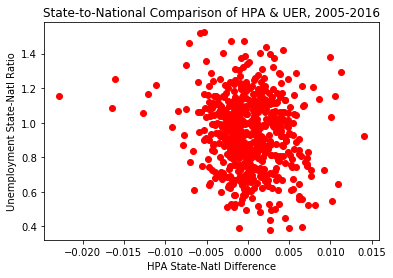

In [30]:
x = df.hpa_difference.values
y = df.uer_ratio.values
plt.figure()
plt.plot(x,y, 'ro')
plt.xlabel('HPA State-Natl Difference')
plt.ylabel('Unemployment State-Natl Ratio')
plt.title('State-to-National Comparison of HPA & UER, 2005-2016')
plt.show()

This plot looks rather noisy, perhaps with some loose negative correlation present. Could it be that HPA and unemployment influence respond to underlying economic force on different time scales? If so, then we might be able to find a clearer pattern taking into account a time lag (i.e., it takes a few months of high unemployment in a locality for defaults to go up and home prices to begin depreciating. Or if home prices depreciate sufficiently, the lack of new construction hurts job growth). We won't address these questions here, but instead we'll break down this plot on a year-by-year basis. 


In [1]:
for year in range(2005,2017):
    year_df = df.loc[year]
    x = year_df.hpa_difference.values
    y = year_df.uer_ratio.values
    plt.plot(x,y, 'ro')
    plt.title('Comparison in Year ' + str(year))
    line = lr.LinearRegression()
    plt.xlim(-0.025,0.015)
    plt.xlabel('HPA State-Natl Difference')
    plt.ylabel('Unemployment State-Natl Ratio')
    for i, txt in enumerate(states):
        plt.annotate(txt,(x[i],y[i]))
    plt.show()



NameError: name 'df' is not defined

The data is slightly easier to read than before, but there is no obvious correlation between the two 'relative' economic variables. One thing that we can note is that during the years of the peak of the crisis (2008-2012, say) we see that the sunshine states (eg, FL, NV, CA, AZ) move between the left and right of the graph, but tend to stay in the upper third. We know that these states experienced especially high delinquency rates during the Recession years. So we hypothesize that delinquency rates remain tied to unemployment moreso than to HPA, which can apparently increase locally (after a crash) without a corresponding drop in delinquency rates. 

In [31]:
state_del_by_year = pd.read_csv('state_del_by_year',index_col=0)
state_del_by_year.drop(['GU','PR','VI'],axis=1,inplace=True)
state_del_by_year

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
2005,0.000,0.161,0.000,0.024,0.016,0.000,0.038,0.000,0.088,0.053,...,0.000,0.075,0.087,0.082,0.039,0.000,0.039,0.029,0.000,0.000
2006,0.045,0.069,0.050,0.049,0.052,0.079,0.185,0.249,0.089,0.098,...,0.000,0.087,0.060,0.044,0.051,0.043,0.025,0.114,0.134,0.000
2007,0.000,0.143,0.207,0.128,0.117,0.086,0.195,0.058,0.139,0.255,...,0.058,0.180,0.121,0.055,0.122,0.080,0.059,0.126,0.179,0.110
2008,0.064,0.303,0.290,0.436,0.365,0.202,0.332,0.296,0.367,0.640,...,0.250,0.334,0.211,0.172,0.212,0.096,0.154,0.245,0.358,0.059
2009,0.299,0.490,0.450,1.009,0.666,0.278,0.607,0.551,0.475,1.098,...,0.195,0.454,0.322,0.453,0.417,0.227,0.364,0.333,0.647,0.406
2010,0.102,0.583,0.483,0.870,0.439,0.300,0.391,0.345,0.406,0.843,...,0.189,0.376,0.284,0.444,0.404,0.382,0.342,0.313,0.530,0.368
2011,0.089,0.418,0.299,0.605,0.324,0.193,0.364,0.284,0.310,0.630,...,0.139,0.346,0.214,0.317,0.307,0.253,0.326,0.203,0.430,0.277
2012,0.042,0.365,0.227,0.456,0.217,0.160,0.273,0.246,0.236,0.488,...,0.139,0.273,0.206,0.177,0.242,0.133,0.286,0.177,0.470,0.187
2013,0.092,0.471,0.359,0.360,0.196,0.121,0.224,0.139,0.159,0.415,...,0.107,0.301,0.213,0.242,0.226,0.187,0.221,0.164,0.580,0.213
2014,0.176,0.442,0.254,0.318,0.176,0.110,0.262,0.054,0.203,0.351,...,0.066,0.293,0.215,0.196,0.216,0.162,0.191,0.203,0.352,0.222


In [34]:
state_del_by_year.LA

2005    2.156
2006    0.180
2007    0.171
2008    0.349
2009    0.429
2010    0.633
2011    0.510
2012    0.340
2013    0.423
2014    0.335
2015    0.339
2016    0.453
Name: LA, dtype: float64

In [32]:
state_del_by_year.loc[2005,'CA']

0.016

We compare delinquency against avg. yearly unemployment in a state. Note LA in 2005 has far and away the highest delinquency rate of any state in any year, which Hurricane Katrina would explain. We set the y-axis range to fit every point on the graph, but can easily adjust the parameter (plt.ylim()) in order to more clearly read the labels of each state. 

It is worth noting that the data, as presented, only considers loans originating in 2005 onwards. Accordingly, the delinquency rates in earlier years may be artificially low, assuming plausibly that many if not most delinquencies occur some time after the loan's origination. 

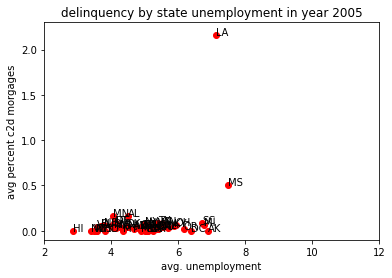

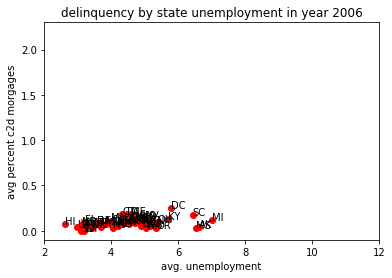

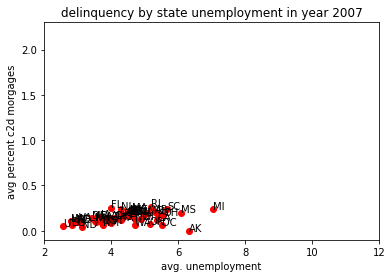

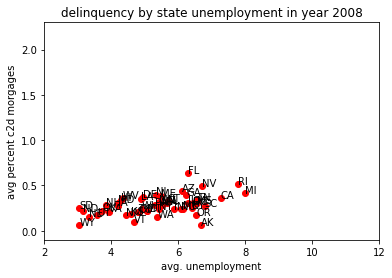

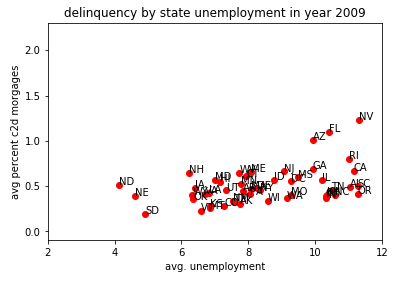

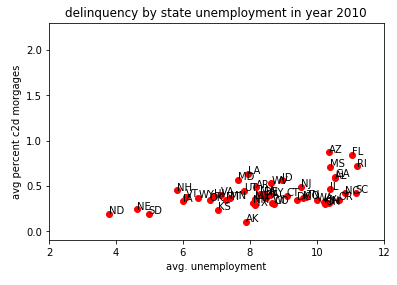

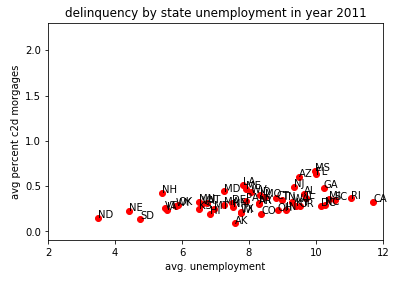

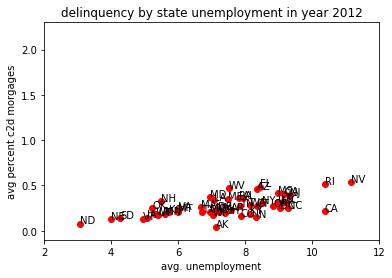

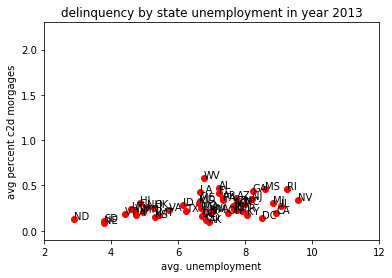

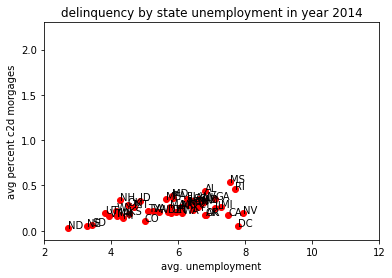

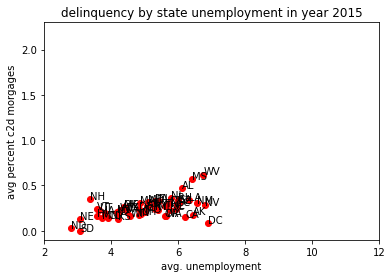

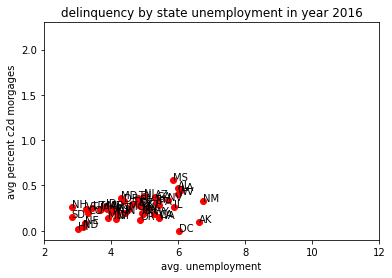

In [41]:
for year in range(2005,2017):
    x = []
    y = []
    year_slice = yearly_state_uer.loc[year]
    for state in states:
        state_slice = year_slice.loc[year_slice['state']==state]
        x.append(state_slice.uer.values[0])
        y.append(state_del_by_year.loc[year,state])
    plt.plot(x,y,'ro')
    plt.title('delinquency by state unemployment in year ' + str(year))
    plt.xlim(2,12)
    plt.xlabel('avg. unemployment')
    plt.ylabel('avg percent c2d morgages')
    plt.ylim(-0.1, 2.3)
    for i, txt in enumerate(states):
        plt.annotate(txt,(x[i],y[i]))
    plt.show()

So far the data appears to be linearly distributed. We plot a least-squares linear regression on each scatter plot and calculate the respective r^2, a measure of correlation. 

In [42]:
import sklearn.linear_model as lr

'the fit of the linreg is 0.14016414029'

'eqn: y = 0.109460270281 * x + -0.450087991799'

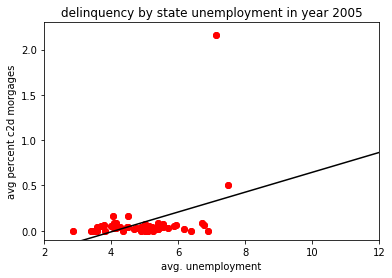

'the fit of the linreg is 0.11649240808'

'eqn: y = 0.01683677378 * x + 0.0124888711298'

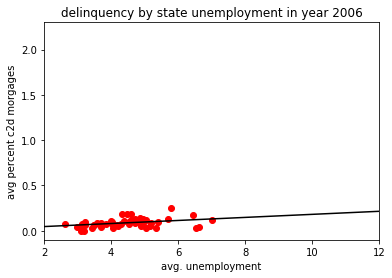

'the fit of the linreg is 0.161160121749'

'eqn: y = 0.0254136735893 * x + 0.0332770205769'

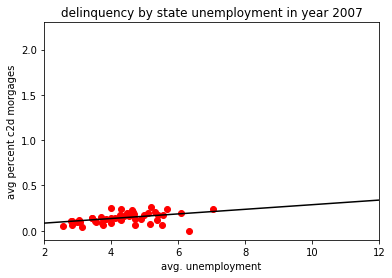

'the fit of the linreg is 0.2292371062'

'eqn: y = 0.0433150296254 * x + 0.0502554190017'

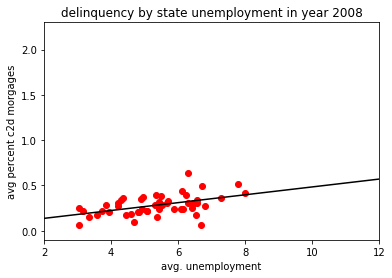

'the fit of the linreg is 0.199093049853'

'eqn: y = 0.0461404082971 * x + 0.112028178276'

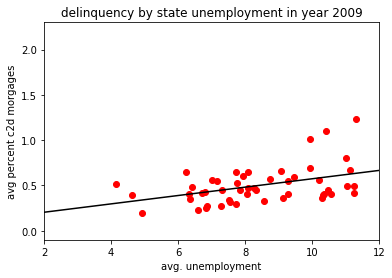

'the fit of the linreg is 0.324052786681'

'eqn: y = 0.0483547161788 * x + 0.00484915521385'

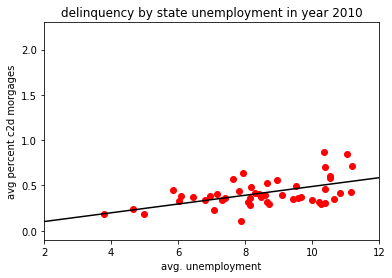

'the fit of the linreg is 0.279862638094'

'eqn: y = 0.0351861947219 * x + 0.0489320848911'

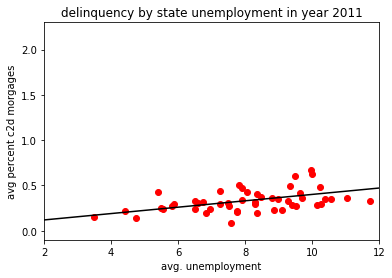

'the fit of the linreg is 0.393425809673'

'eqn: y = 0.0405548409536 * x + -0.0311229091879'

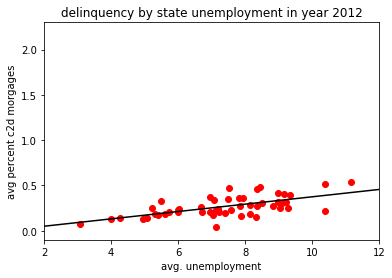

'the fit of the linreg is 0.198129727774'

'eqn: y = 0.0311684976988 * x + 0.0516905695838'

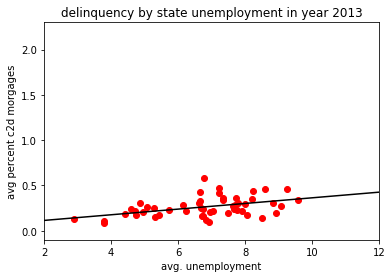

'the fit of the linreg is 0.24058020685'

'eqn: y = 0.0401170025616 * x + 0.0182969432163'

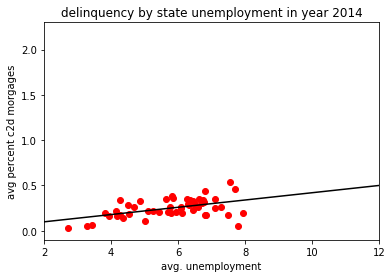

'the fit of the linreg is 0.280986672465'

'eqn: y = 0.0547179831064 * x + -0.0302257390129'

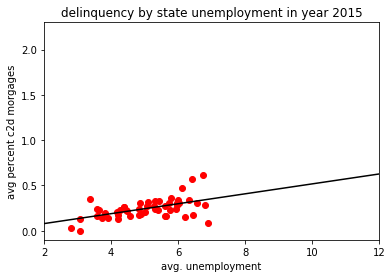

'the fit of the linreg is 0.156489406186'

'eqn: y = 0.0446611755593 * x + 0.0387566952283'

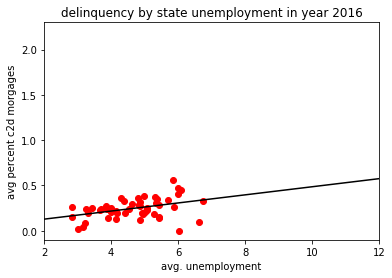

In [45]:
inpoints = np.linspace(2,12,100)

for year in range(2005,2017):
    x = []
    y = []
    year_slice = yearly_state_uer.loc[year]
    for state in states:
        state_slice = year_slice.loc[year_slice['state']==state]
        x.append(state_slice.uer.values[0])
        y.append(state_del_by_year.loc[year,state])
    plt.plot(x,y,'ro')
    plt.title('delinquency by state unemployment in year ' + str(year))
    plt.xlim(2,12)
    plt.xlabel('avg. unemployment')
    plt.ylabel('avg percent c2d morgages')
    plt.ylim(-0.1, 2.3)
    line = lr.LinearRegression()
    X = np.array(x)
    X = X.reshape(-1,1)
    line.fit(X,y)
    display('the fit of the linreg is ' + str(line.score(X,y)))
    m,b = line.coef_[0], line.intercept_
    #display('eqn: y = ' + str(m) + " * x + " + str(b))
    outpoints = m*inpoints + b
    plt.plot(inpoints, outpoints, 'k-')
    plt.show()

We compare this against an attempted correlation of HPA and delinquency rates. 

Comparing delinquency to HPA

'the fit of the linreg is 0.00100131887945'

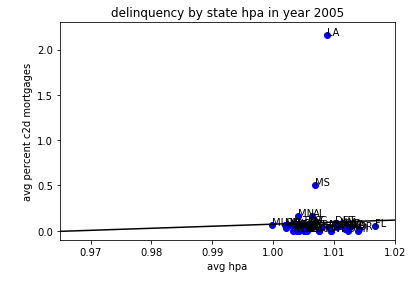

'the fit of the linreg is 0.0815268984627'

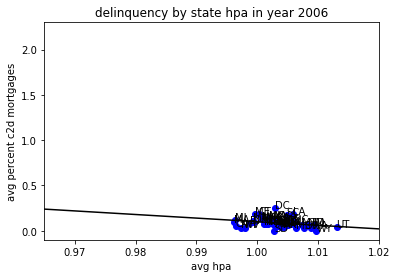

'the fit of the linreg is 0.109064238091'

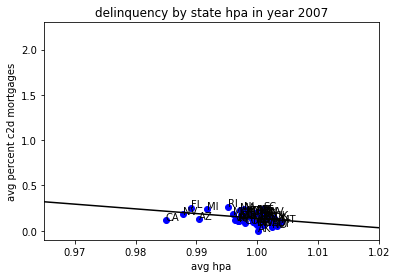

'the fit of the linreg is 0.395725477236'

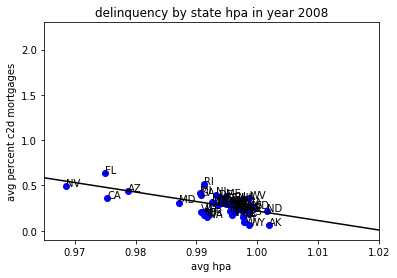

'the fit of the linreg is 0.354979957199'

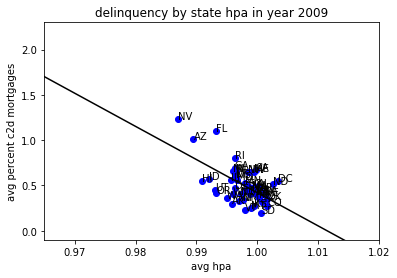

'the fit of the linreg is 0.278170190767'

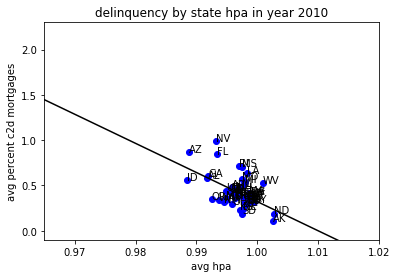

'the fit of the linreg is 0.0884165584364'

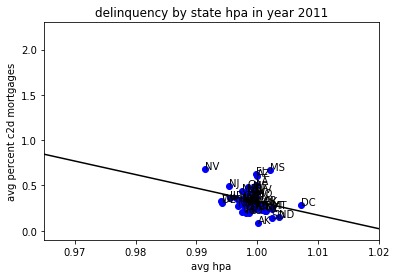

'the fit of the linreg is 0.0254608472347'

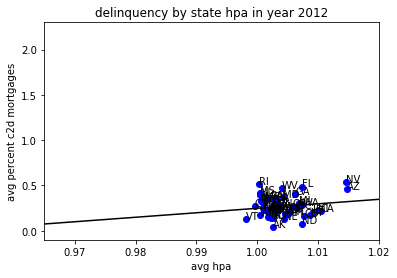

'the fit of the linreg is 4.83157173248e-06'

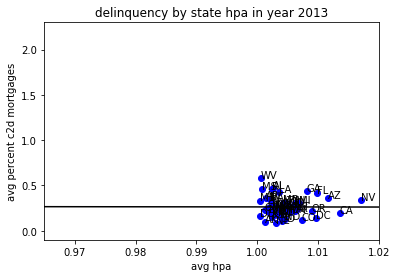

'the fit of the linreg is 0.10185802544'

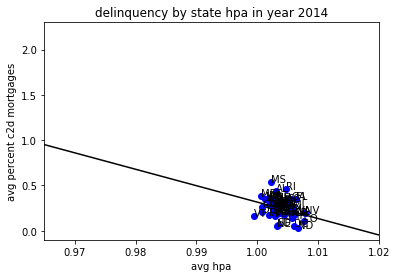

'the fit of the linreg is 0.00939018892878'

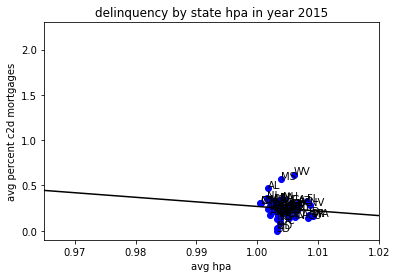

'the fit of the linreg is 0.00416393225567'

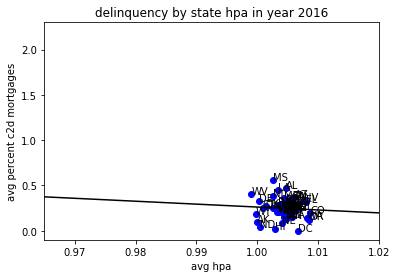

In [58]:
inpoints = np.linspace(0.965,1.02,50)
for year in range(2005,2017):
    x = []
    y = []
    year_slice = yearly_hpas.loc[year]
    for state in states:
        state_slice = year_slice.loc[year_slice['state']==state]
        x.append(state_slice.hpa.values[0])
        y.append(state_del_by_year.loc[year,state])
    plt.plot(x,y,'bo')
    plt.title('delinquency by state hpa in year ' + str(year))
    plt.xlabel('avg hpa')
    plt.xlim(0.965,1.02)
    plt.ylim(-0.1,2.3)
    plt.ylabel('avg percent c2d mortgages')
    for i, txt in enumerate(states):
        plt.annotate(txt,(x[i],y[i]))
    line = lr.LinearRegression()    
    X = np.array(x)
    X = X.reshape(-1,1)
    line.fit(X,y)
    display('the fit of the linreg is ' + str(line.score(X,y)))
    m,b = line.coef_[0], line.intercept_
    outpoints = m*inpoints + b
    plt.plot(inpoints, outpoints, 'k-')
    plt.show()

On the whole, avg. HPA is more weakly correlated to delinquency rates than is unemployment. However, in two years, viz. '08 and '09, the HPA correlation is ~0.35, which is nearly as good an r^2 as the unemployment comparison attained in its peak year (2012). We can conclude from this that rather negative HPA in a region--i.e., sharply declining home prices--is a good indicator of higher delinquencies, but that this correlation is not as pronounced for positive or neutral HPAs. 

Conclusion: Statewide delinquency rates respond in a positive, consistent manner to changes in unemployment, and this correlation is stronger, on balance, than that of delinquency and HPA. However, sharp declines in home price are a fairly good indicator of high delinquency rates. This suggests that a correlation between HPA and delinquency rates is not strictly linear. We should continue exploration into machine learning algorithm such as the Random Forest that can incorporate such variables with a non-linear effect on classification more readily than a logistic regression can. 